# An excercise based on Kevin Markham PyCon 2018 talk

Aim of this excercise is to understand how to work with pandas libraries and make useful inferences out of it

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ri stands for Rhode Island
ri = pd.read_csv('police.csv')

In [3]:
ri.head()

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [4]:
ri.shape

(91741, 15)

In [5]:
ri.dtypes

stop_date              object
stop_time              object
county_name           float64
driver_gender          object
driver_age_raw        float64
driver_age            float64
driver_race            object
violation_raw          object
violation              object
search_conducted         bool
search_type            object
stop_outcome           object
is_arrested            object
stop_duration          object
drugs_related_stop       bool
dtype: object

In [6]:
#Missing data?
ri.isnull().sum()

stop_date                 0
stop_time                 0
county_name           91741
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

In [7]:
(True == 1) and (False == 0)

True

# 1-Removing columns

Remove the column that only contains missing values

In [8]:
# axis=1 also works, inplace is False by default, inplace=True avoids assignment statement
ri.drop('county_name', axis='columns', inplace=True)

In [9]:
ri.shape

(91741, 14)

In [10]:
ri.columns

Index(['stop_date', 'stop_time', 'driver_gender', 'driver_age_raw',
       'driver_age', 'driver_race', 'violation_raw', 'violation',
       'search_conducted', 'search_type', 'stop_outcome', 'is_arrested',
       'stop_duration', 'drugs_related_stop'],
      dtype='object')

In [11]:
# alternative method
ri.dropna(axis='columns', how='all').shape

(91741, 14)

In [12]:
# del.ri['county_name']

# 2- Comparing groups

Do men or women speed more often?

In [13]:
ri['violation'][:5]

0    Speeding
1    Speeding
2    Speeding
3       Other
4    Speeding
Name: violation, dtype: object

In [14]:
ri['violation'].value_counts()

Speeding               48463
Moving violation       16224
Equipment              11020
Other                   4317
Registration/plates     3432
Seat belt               2952
Name: violation, dtype: int64

In [15]:
#Let's check gender
ri['driver_gender'][:5]

0    M
1    M
2    M
3    M
4    F
Name: driver_gender, dtype: object

In [16]:
ri['driver_gender'].value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

In [17]:
# when someone is stopped for speeding, how often is it a man or woman?
ri[ri.violation == 'Speeding'].driver_gender.value_counts()

M    32979
F    15482
Name: driver_gender, dtype: int64

In [18]:
ri[ri.violation == 'Speeding'].driver_gender.value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [19]:
# alternative
ri.loc[ri.violation == 'Speeding', 'driver_gender'].value_counts(normalize=True)

M    0.680527
F    0.319473
Name: driver_gender, dtype: float64

In [20]:
# when a man is pulled over, how often is it for speeding?
ri[ri.driver_gender == 'M'].violation.value_counts()

Speeding               32979
Moving violation       13020
Equipment               8533
Other                   3627
Registration/plates     2419
Seat belt               2317
Name: violation, dtype: int64

In [21]:
#Let's normalize
ri[ri.driver_gender == 'M'].violation.value_counts(normalize= True)

Speeding               0.524350
Moving violation       0.207012
Equipment              0.135671
Other                  0.057668
Registration/plates    0.038461
Seat belt              0.036839
Name: violation, dtype: float64

In [22]:
# What about women
ri[ri.driver_gender == 'F'].violation.value_counts(normalize=True)

Speeding               0.658500
Moving violation       0.136277
Equipment              0.105780
Registration/plates    0.043086
Other                  0.029348
Seat belt              0.027009
Name: violation, dtype: float64

### Use groupby

In [23]:
# combines the two lines above
ri.groupby('driver_gender').violation.value_counts(normalize=True)

driver_gender  violation          
F              Speeding               0.658500
               Moving violation       0.136277
               Equipment              0.105780
               Registration/plates    0.043086
               Other                  0.029348
               Seat belt              0.027009
M              Speeding               0.524350
               Moving violation       0.207012
               Equipment              0.135671
               Other                  0.057668
               Registration/plates    0.038461
               Seat belt              0.036839
Name: violation, dtype: float64

In [24]:
# Or we can add .loc 
ri.groupby('driver_gender').violation.value_counts(normalize=True).loc[:,'Speeding']

driver_gender
F    0.65850
M    0.52435
Name: violation, dtype: float64

Same result filtered with speeding 

In [25]:
# Change it other way around 
ri.groupby('violation').driver_gender.value_counts(normalize=True)

violation            driver_gender
Equipment            M                0.774319
                     F                0.225681
Moving violation     M                0.802515
                     F                0.197485
Other                M                0.840167
                     F                0.159833
Registration/plates  M                0.704837
                     F                0.295163
Seat belt            M                0.784892
                     F                0.215108
Speeding             M                0.680527
                     F                0.319473
Name: driver_gender, dtype: float64

In [26]:
# adding .loc like earlier
ri.groupby('violation').driver_gender.value_counts(normalize=True).loc[:,'M']

violation
Equipment              0.774319
Moving violation       0.802515
Other                  0.840167
Registration/plates    0.704837
Seat belt              0.784892
Speeding               0.680527
Name: driver_gender, dtype: float64

**Interesting enough, if we look at voilation it gives more/higher %age of male. If we take value count with gender then it shows female have a higher %age.**

# 3)- Examining Relationship

Does gender affect who gets searched during a stop?

In [27]:
ri.search_conducted[:5]

0    False
1    False
2    False
3    False
4    False
Name: search_conducted, dtype: bool

In [28]:
ri.search_conducted.value_counts(normalize=True)

False    0.965163
True     0.034837
Name: search_conducted, dtype: float64

**This feature has unbalanced data which is more toward False i.e no search conducted**

In [29]:
ri.search_conducted.mean()

0.03483720473942948

In [30]:
ri.groupby('driver_gender').search_conducted.mean()

driver_gender
F    0.020033
M    0.043326
Name: search_conducted, dtype: float64

In [31]:
# include a second factor
ri.groupby(['violation', 'driver_gender']).search_conducted.mean()

violation            driver_gender
Equipment            F                0.042622
                     M                0.070081
Moving violation     F                0.036205
                     M                0.059831
Other                F                0.056522
                     M                0.047146
Registration/plates  F                0.066140
                     M                0.110376
Seat belt            F                0.012598
                     M                0.037980
Speeding             F                0.008720
                     M                0.024925
Name: search_conducted, dtype: float64

# 4)- Handling missing values
Why is search_type missing so often?

In [32]:
ri.isnull().sum()

stop_date                 0
stop_time                 0
driver_gender          5335
driver_age_raw         5327
driver_age             5621
driver_race            5333
violation_raw          5333
violation              5333
search_conducted          0
search_type           88545
stop_outcome           5333
is_arrested            5333
stop_duration          5333
drugs_related_stop        0
dtype: int64

search_type    ...................       88545

In [33]:
ri[ri.isnull().any(axis=1)].head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [34]:
# maybe search_type is missing any time search_conducted is False?
ri.search_conducted.value_counts()

False    88545
True      3196
Name: search_conducted, dtype: int64

In [35]:
# Let's examine what data search type has
ri.search_type.value_counts()

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Incident to Arrest,Inventory,Protective Frisk                 11
Inventory,Protective Fris

These all values add up to 3196 i.e number of times search conducted.

In [36]:
ri[ri.search_conducted == False].search_type.value_counts()

Series([], Name: search_type, dtype: int64)

We are asking when search_conducted is not happening then how many search_type values exist. It is giving us empty value.Why? <br>

The search_type value is in case of search_conducted = false is always null. So, Not a number and that is why we see no value.

In [37]:
# value_counts ignores missing values by default
ri[ri.search_conducted == False].search_type.value_counts(dropna=False)

NaN    88545
Name: search_type, dtype: int64

In [38]:
# when search_conducted is True, search_type is never missing
ri[ri.search_conducted == True].search_type.value_counts(dropna=False)

Incident to Arrest                                          1219
Probable Cause                                               891
Inventory                                                    220
Reasonable Suspicion                                         197
Protective Frisk                                             161
Incident to Arrest,Inventory                                 129
Incident to Arrest,Probable Cause                            106
Probable Cause,Reasonable Suspicion                           75
Incident to Arrest,Inventory,Probable Cause                   34
Probable Cause,Protective Frisk                               33
Incident to Arrest,Protective Frisk                           33
Inventory,Probable Cause                                      22
Incident to Arrest,Reasonable Suspicion                       13
Protective Frisk,Reasonable Suspicion                         11
Inventory,Protective Frisk                                    11
Incident to Arrest,Invent

In [39]:
# alternative
ri[ri.search_conducted == True].search_type.isnull().sum()

0

# 5- Using String method

During a search, how often is the driver frisked? <br>
Use string methods to find partial matches

In [40]:
# multiple types are separated by commas
ri.search_type.value_counts(dropna=False)

NaN                                                         88545
Incident to Arrest                                           1219
Probable Cause                                                891
Inventory                                                     220
Reasonable Suspicion                                          197
Protective Frisk                                              161
Incident to Arrest,Inventory                                  129
Incident to Arrest,Probable Cause                             106
Probable Cause,Reasonable Suspicion                            75
Incident to Arrest,Inventory,Probable Cause                    34
Probable Cause,Protective Frisk                                33
Incident to Arrest,Protective Frisk                            33
Inventory,Probable Cause                                       22
Incident to Arrest,Reasonable Suspicion                        13
Incident to Arrest,Inventory,Protective Frisk                  11
Inventory,

In [41]:
# To search a string(i.e Protective Frisk embedded with commas in search type ), we need contains function 
ri.search_type.str.contains('Protective Frisk')

0         NaN
1         NaN
2         NaN
3         NaN
4         NaN
5         NaN
6         NaN
7         NaN
8         NaN
9         NaN
10        NaN
11        NaN
12        NaN
13        NaN
14        NaN
15        NaN
16        NaN
17        NaN
18        NaN
19        NaN
20        NaN
21        NaN
22        NaN
23        NaN
24       True
25        NaN
26        NaN
27        NaN
28        NaN
29        NaN
         ... 
91711     NaN
91712     NaN
91713     NaN
91714     NaN
91715     NaN
91716     NaN
91717     NaN
91718     NaN
91719     NaN
91720     NaN
91721     NaN
91722     NaN
91723     NaN
91724     NaN
91725     NaN
91726     NaN
91727     NaN
91728     NaN
91729     NaN
91730     NaN
91731     NaN
91732     NaN
91733     NaN
91734     NaN
91735     NaN
91736     NaN
91737     NaN
91738     NaN
91739     NaN
91740     NaN
Name: search_type, Length: 91741, dtype: object

When we get a match, we get true else we get false

In [42]:
# Add a new feature
ri['frisk']=ri.search_type.str.contains('Protective Frisk')

In [43]:
ri['frisk'].value_counts()

False    2922
True      274
Name: frisk, dtype: int64

In [44]:
# Checking if we have NaN values
ri['frisk'].value_counts(dropna=False)

NaN      88545
False     2922
True       274
Name: frisk, dtype: int64

In [45]:
# to see our true values
ri['frisk'].sum()

274

In [46]:
#%age of true vales
ri['frisk'].mean()

0.08573216520650813

So, 8.5% times when there is a search then there is a frisk

In [47]:
# excludes stops that didn't involve a search
274 / (2922 + 274)

0.08573216520650813

# 6)-Combining date and time

 Which year had the least number of stops?
 
 USe string method i.e split or slice

In [48]:
# stop_date is our feature to be considered
ri.stop_date.str.slice(0, 4)

0        2005
1        2005
2        2005
3        2005
4        2005
5        2005
6        2005
7        2005
8        2005
9        2005
10       2005
11       2005
12       2005
13       2005
14       2005
15       2005
16       2005
17       2005
18       2005
19       2005
20       2005
21       2005
22       2005
23       2005
24       2005
25       2005
26       2005
27       2005
28       2005
29       2005
         ... 
91711    2015
91712    2015
91713    2015
91714    2015
91715    2015
91716    2015
91717    2015
91718    2015
91719    2015
91720    2015
91721    2015
91722    2015
91723    2015
91724    2015
91725    2015
91726    2015
91727    2015
91728    2015
91729    2015
91730    2015
91731    2015
91732    2015
91733    2015
91734    2015
91735    2015
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_date, Length: 91741, dtype: object

In [49]:
ri.stop_date.str.slice(0, 4).value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_date, dtype: int64

In [50]:
# ALternative way
combined = ri.stop_date.str.cat(ri.stop_time, sep=' ')
combined[:5]

0    2005-01-02 01:55
1    2005-01-18 08:15
2    2005-01-23 23:15
3    2005-02-20 17:15
4    2005-03-14 10:00
Name: stop_date, dtype: object

In [51]:
ri['stop_datetime'] = pd.to_datetime(combined) # note this function for datetime

In [52]:
ri.dtypes

stop_date                     object
stop_time                     object
driver_gender                 object
driver_age_raw               float64
driver_age                   float64
driver_race                   object
violation_raw                 object
violation                     object
search_conducted                bool
search_type                   object
stop_outcome                  object
is_arrested                   object
stop_duration                 object
drugs_related_stop              bool
frisk                         object
stop_datetime         datetime64[ns]
dtype: object

stop_datetime  ..............       datetime64[ns]

In [53]:
ri.stop_datetime[:5]

0   2005-01-02 01:55:00
1   2005-01-18 08:15:00
2   2005-01-23 23:15:00
3   2005-02-20 17:15:00
4   2005-03-14 10:00:00
Name: stop_datetime, dtype: datetime64[ns]

In [54]:
# Format is same like string.1st dataetime then dt
ri.stop_datetime.dt.year

0        2005
1        2005
2        2005
3        2005
4        2005
5        2005
6        2005
7        2005
8        2005
9        2005
10       2005
11       2005
12       2005
13       2005
14       2005
15       2005
16       2005
17       2005
18       2005
19       2005
20       2005
21       2005
22       2005
23       2005
24       2005
25       2005
26       2005
27       2005
28       2005
29       2005
         ... 
91711    2015
91712    2015
91713    2015
91714    2015
91715    2015
91716    2015
91717    2015
91718    2015
91719    2015
91720    2015
91721    2015
91722    2015
91723    2015
91724    2015
91725    2015
91726    2015
91727    2015
91728    2015
91729    2015
91730    2015
91731    2015
91732    2015
91733    2015
91734    2015
91735    2015
91736    2015
91737    2015
91738    2015
91739    2015
91740    2015
Name: stop_datetime, Length: 91741, dtype: int64

In [55]:
ri.stop_datetime.dt.week

0        53
1         3
2         3
3         7
4        11
5        12
6        13
7        23
8        28
9        28
10       28
11       28
12       28
13       29
14       29
15       29
16       29
17       29
18       29
19       29
20       30
21       31
22       32
23       33
24       34
25       35
26       37
27       38
28       38
29       39
         ..
91711    53
91712    53
91713    53
91714    53
91715    53
91716    53
91717    53
91718    53
91719    53
91720    53
91721    53
91722    53
91723    53
91724    53
91725    53
91726    53
91727    53
91728    53
91729    53
91730    53
91731    53
91732    53
91733    53
91734    53
91735    53
91736    53
91737    53
91738    53
91739    53
91740    53
Name: stop_datetime, Length: 91741, dtype: int64

In [56]:
# why is 2005 so much smaller?
ri.stop_datetime.dt.year.value_counts()

2012    10970
2006    10639
2007     9476
2014     9228
2008     8752
2015     8599
2011     8126
2013     7924
2009     7908
2010     7561
2005     2558
Name: stop_datetime, dtype: int64

In [57]:
ri.stop_datetime.dt.year.value_counts().sort_values()

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

In [58]:
# Same output could be done adding ascending parameter
ri.stop_datetime.dt.year.value_counts(ascending=True)

2005     2558
2010     7561
2009     7908
2013     7924
2011     8126
2015     8599
2008     8752
2014     9228
2007     9476
2006    10639
2012    10970
Name: stop_datetime, dtype: int64

In [59]:
# We can pick a year value as well
ri.stop_datetime.dt.year.value_counts().sort_values().index[0]

2005

# 8)-Plotting a time series
How does drug activity change by time of day?

In [60]:
ri.drugs_related_stop.dtype

dtype('bool')

In [61]:
ri.drugs_related_stop[:5]

0    False
1    False
2    False
3    False
4    False
Name: drugs_related_stop, dtype: bool

In [62]:
# baseline rate
ri.drugs_related_stop.mean()

0.008883705213590434

What %age of time during a traffic stop is considered drug related 

In [63]:
# can't groupby 'hour' unless you create it as a column
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean()

stop_datetime
0     0.019728
1     0.013507
2     0.015462
3     0.017065
4     0.011811
5     0.004762
6     0.003040
7     0.003281
8     0.002687
9     0.006288
10    0.005714
11    0.006976
12    0.004467
13    0.010326
14    0.007810
15    0.006416
16    0.005723
17    0.005517
18    0.010148
19    0.011596
20    0.008084
21    0.013342
22    0.013533
23    0.016344
Name: drugs_related_stop, dtype: float64

showing %age of time when a traffic stop occured due to drug relating stopping

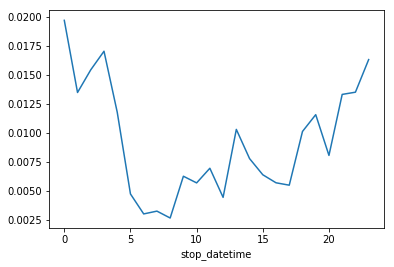

In [64]:
 #line plot by default (for a Series)
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.mean().plot()

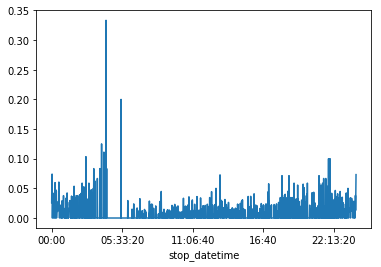

In [65]:
# Or by using .time instead of hour
ri.groupby(ri.stop_datetime.dt.time).drugs_related_stop.mean().plot()

Though it is hard to interpret

### use count as instead for mean

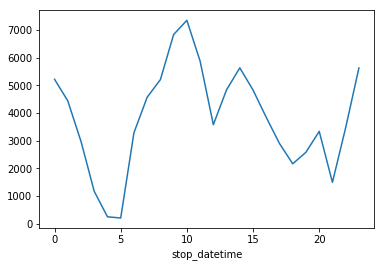

In [66]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.count().plot()

We can see how overall count is different per hour than mean stop_time

In [67]:
# alternative: count drug-related stops by hour
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum()

stop_datetime
0     103.0
1      60.0
2      46.0
3      20.0
4       3.0
5       1.0
6      10.0
7      15.0
8      14.0
9      43.0
10     42.0
11     41.0
12     16.0
13     50.0
14     44.0
15     31.0
16     22.0
17     16.0
18     22.0
19     30.0
20     27.0
21     20.0
22     47.0
23     92.0
Name: drugs_related_stop, dtype: float64

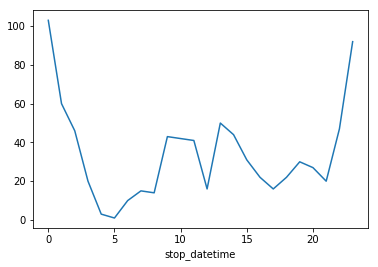

In [68]:
ri.groupby(ri.stop_datetime.dt.hour).drugs_related_stop.sum().plot()

# 9)-Creating useful plots
Do most stops occur at night?
Nothing to do with drugs

In [69]:
ri.stop_datetime.dt.hour

0         1
1         8
2        23
3        17
4        10
5         9
6        17
7        13
8        10
9        15
10       16
11       19
12       19
13       19
14       19
15        0
16        0
17       23
18        0
19       20
20       12
21       16
22        2
23       10
24        1
25       16
26       10
27       13
28       22
29        1
         ..
91711    15
91712    16
91713    17
91714    17
91715    23
91716    23
91717     0
91718     0
91719     6
91720     6
91721     6
91722     7
91723     7
91724     7
91725     8
91726     8
91727     9
91728    13
91729    14
91730    15
91731    16
91732    19
91733    19
91734    20
91735    20
91736    20
91737    20
91738    20
91739    21
91740    22
Name: stop_datetime, Length: 91741, dtype: int64

In [70]:
ri.stop_datetime.dt.hour.value_counts()

10    7350
9     6838
11    5877
14    5634
23    5629
0     5221
8     5210
13    4842
15    4832
7     4572
1     4442
16    3844
12    3582
22    3473
20    3340
6     3290
2     2975
17    2900
19    2587
18    2168
21    1499
3     1172
4      254
5      210
Name: stop_datetime, dtype: int64

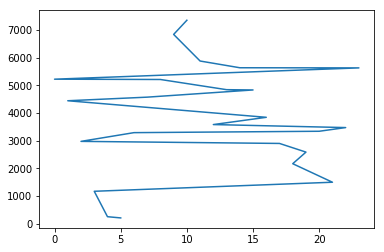

In [71]:
ri.stop_datetime.dt.hour.value_counts().plot()

It does not look right. We have two options. Either sort values or sort index.

In [72]:
ri.stop_datetime.dt.hour.value_counts().sort_values()

5      210
4      254
3     1172
21    1499
18    2168
19    2587
17    2900
2     2975
6     3290
20    3340
22    3473
12    3582
16    3844
1     4442
7     4572
15    4832
13    4842
8     5210
0     5221
23    5629
14    5634
11    5877
9     6838
10    7350
Name: stop_datetime, dtype: int64

Values are in lower to higher order. i.e lower number at start and higher at end

In [73]:
ri.stop_datetime.dt.hour.value_counts().sort_index()

0     5221
1     4442
2     2975
3     1172
4      254
5      210
6     3290
7     4572
8     5210
9     6838
10    7350
11    5877
12    3582
13    4842
14    5634
15    4832
16    3844
17    2900
18    2168
19    2587
20    3340
21    1499
22    3473
23    5629
Name: stop_datetime, dtype: int64

Now, we have a sorted index. This seems to be better solution to plot

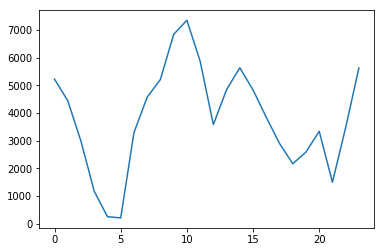

In [74]:
#Solution is sort_index
ri.stop_datetime.dt.hour.value_counts().sort_index().plot()

notice how this plot is same as above count function plot

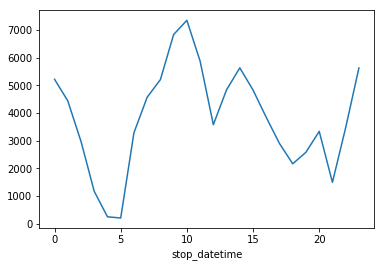

In [75]:
# alternative method- groupby with stop_datetime and stop_date
ri.groupby(ri.stop_datetime.dt.hour).stop_date.count().plot()

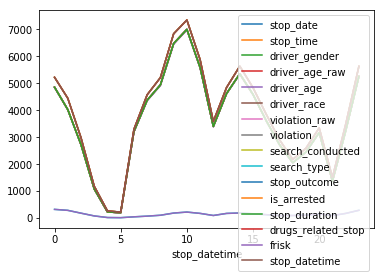

In [76]:
# to check on all features
ri.groupby(ri.stop_datetime.dt.hour).count().plot()

In [77]:
# One way is to see by night time. Let's say we decide that night time is between 22:00 to 4:00

ri[(ri.stop_datetime.dt.hour > 4) & (ri.stop_datetime.dt.hour < 22)].shape

(68575, 16)

In [78]:
ri.shape

(91741, 16)

In [79]:
91741-68575

23166

We can check and get idea without any plot how many stops we have at night or our given time 

# 10-Fixing bad data
Find the bad data in the stop_duration column and fix it

In [80]:
ri.stop_duration.value_counts()

0-15 Min     69543
16-30 Min    13635
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

This 1 and 2 are erroneous data points. We do not know what they mean . So, they can be considered as bad data

In [81]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

NaN values are always problemtic. We need to see more of domain and see if these are bad data or not. They are missing values for sure

### how to fix
- We can change 1 considering it an hour
- We can remove values that are misisng ot erroneous
- We can use replace function to do this

In [82]:
# what four things are wrong with this code?
ri[ri.stop_duration == 1 | ri.stop_duration == 2].stop_duration = 'NaN'

TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]

- 1- parenthesis for filtering <br>
- 2- 1 and 2 are not ints ....they are strings (TypeError: cannot compare a dtyped [object] array with a scalar of type [bool]
)

In [83]:
ri['stop_duration'].dtypes

dtype('O')

This shows that it is object and it should contain strings as its data-points

In [84]:
ri[(ri.stop_duration == '1') | (ri.stop_duration == '2')].stop_duration = 'NaN'

C:\Users\Hassan\AppData\Roaming\Python\Python36\site-packages\pandas\core\generic.py:4405: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [85]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
2                1
1                1
Name: stop_duration, dtype: int64

Nothing changed. Though it was only a warning yet we cannot ignore it.

In [87]:
# To fix setting with copy warning
# Format is what rows we want....i.e ri.stop_duration == '1') | (ri.stop_duration == '2
# For columns, we want to work on stop_duration so add then after comma
ri.loc[(ri.stop_duration == '1') | (ri.stop_duration == '2'), 'stop_duration'] = 'NaN'

In [88]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5333
30+ Min       3228
NaN              2
Name: stop_duration, dtype: int64

We have two set of NaN. One with 5333 and one with 2. Did we duplicate?

NaN with 2 is a acting as string. But, NaN is not a string. So, we need to fix NaN issue

In [89]:
# replace 'NaN' string with actual NaN value
import numpy as np
ri.loc[ri.stop_duration == 'NaN', 'stop_duration'] = np.nan

In [90]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

NaN    .................       5335

In [91]:
# alternative method
ri.stop_duration.replace(['1', '2'], value=np.nan, inplace=True)

In [92]:
ri.stop_duration.value_counts(dropna=False)

0-15 Min     69543
16-30 Min    13635
NaN           5335
30+ Min       3228
Name: stop_duration, dtype: int64

Key learning is: <br>
    
- Don't ignore the SettingWithCopyWarning
- NaN is not a string

# 11)- Convert strings to numbers

What is the mean stop_duration for each violation_raw

In [93]:
mapping = {'0-15 Min':8, '16-30 Min':23, '30+ Min':45}
ri['stop_minutes'] = ri.stop_duration.map(mapping)

In [94]:
# matches value_counts for stop_duration
ri.stop_minutes.value_counts()

8.0     69543
23.0    13635
45.0     3228
Name: stop_minutes, dtype: int64

In [95]:
ri.groupby('violation_raw').stop_minutes.mean()

violation_raw
APB                                 20.987342
Call for Service                    22.034669
Equipment/Inspection Violation      11.460345
Motorist Assist/Courtesy            16.916256
Other Traffic Violation             13.900265
Registration Violation              13.745629
Seatbelt Violation                   9.741531
Special Detail/Directed Patrol      15.061100
Speeding                            10.577690
Suspicious Person                   18.750000
Violation of City/Town Ordinance    13.388626
Warrant                             21.400000
Name: stop_minutes, dtype: float64

In [96]:
ri.groupby('violation_raw').stop_minutes.agg(['mean', 'count'])

,mean,count
violation_raw,,
APB,20.987342,79
Call for Service,22.034669,1298
Equipment/Inspection Violation,11.460345,11020
Motorist Assist/Courtesy,16.916256,203
Other Traffic Violation,13.900265,16223
Registration Violation,13.745629,3432
Seatbelt Violation,9.741531,2952
Special Detail/Directed Patrol,15.061100,2455
Speeding,10.577690,48462


# 12)- Other plotting

Plot the results of groupby

In [97]:
ri.violation_raw.value_counts()

Speeding                            48463
Other Traffic Violation             16224
Equipment/Inspection Violation      11020
Registration Violation               3432
Seatbelt Violation                   2952
Special Detail/Directed Patrol       2455
Call for Service                     1298
Violation of City/Town Ordinance      211
Motorist Assist/Courtesy              203
APB                                    79
Suspicious Person                      56
Warrant                                15
Name: violation_raw, dtype: int64

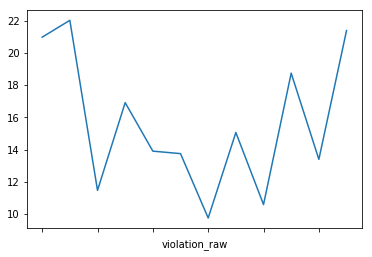

In [98]:
ri.groupby('violation_raw').stop_minutes.mean().plot()

We don't get much info out of it. As we are using categorical variable. We better use bar plot

### bar plot

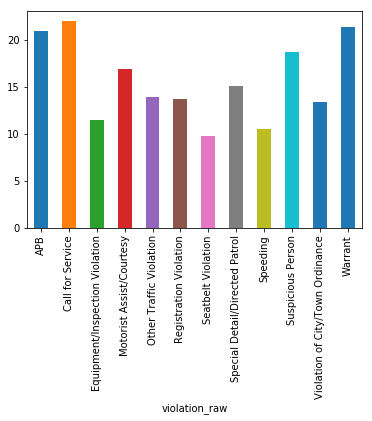

In [99]:
ri.groupby('violation_raw').stop_minutes.mean().plot(kind='bar')

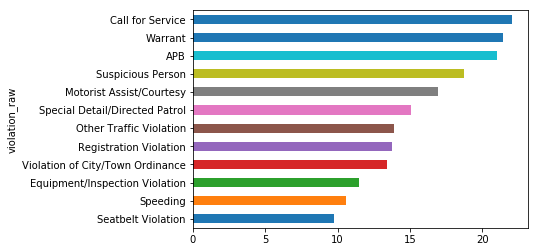

In [100]:
ri.groupby('violation_raw').stop_minutes.mean().sort_values().plot(kind='barh')

# 13)-Histogram
Compare the age distributions for each violation

In [101]:
ri.groupby('violation').driver_age.describe()

,count,mean,std,min,25%,50%,75%,max
violation,,,,,,,,
Equipment,11007.0,31.781503,11.400900,16.0,23.0,28.0,38.0,89.0
Moving violation,16164.0,36.120020,13.185805,15.0,25.0,33.0,46.0,99.0
Other,4204.0,39.536870,13.034639,16.0,28.0,39.0,49.0,87.0
Registration/plates,3427.0,32.803035,11.033675,16.0,24.0,30.0,40.0,74.0
Seat belt,2952.0,32.206301,11.213122,17.0,24.0,29.0,38.0,77.0
Speeding,48361.0,33.530097,12.821847,15.0,23.0,30.0,42.0,90.0


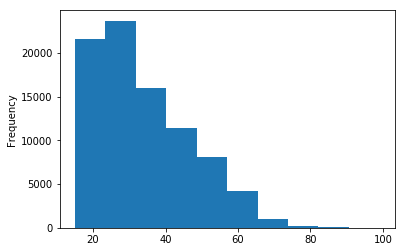

In [102]:
ri.driver_age.plot(kind='hist')

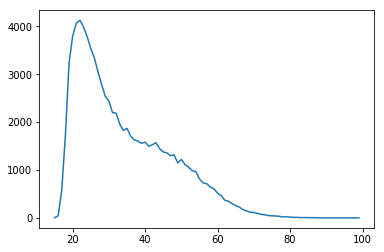

In [103]:
# similar to a histogram
ri.driver_age.value_counts().sort_index().plot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002828E4034E0>,
      dtype=object)

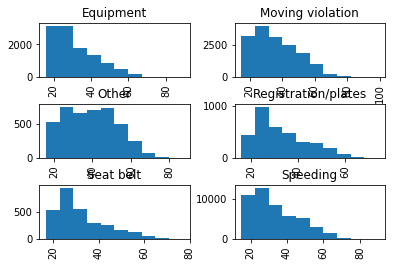

In [104]:
# can't use the plot method
ri.hist('driver_age', by='violation')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028292C8A7F0>,
      dtype=object)

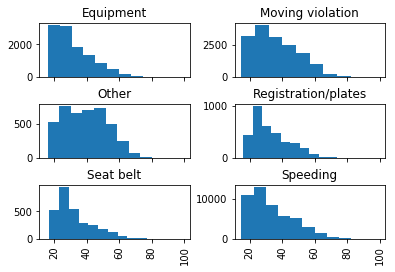

In [105]:
# For better view of plots
ri.hist('driver_age', by='violation', sharex=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028292F17A20>,
      dtype=object)

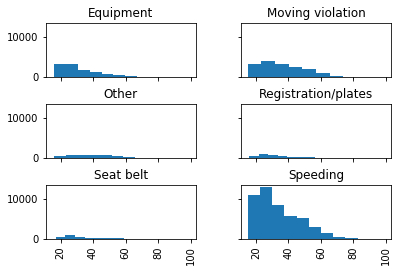

In [106]:
ri.hist('driver_age', by='violation', sharex=True, sharey=True)

We need to be conscious of axes when using grouped plots

# 14)- Add feature

Pretend you don't have the driver_age column, and create it from driver_age_raw (and call it new_age)

In [107]:
ri.head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
0,2005-01-02,01:55,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-02 01:55:00,8.0
1,2005-01-18,08:15,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-18 08:15:00,8.0
2,2005-01-23,23:15,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-01-23 23:15:00,8.0
3,2005-02-20,17:15,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False,NaN,2005-02-20 17:15:00,23.0
4,2005-03-14,10:00,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2005-03-14 10:00:00,8.0


In [109]:
ri.tail()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes
91736,2015-12-31,20:27,M,1986.0,29.0,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:27:00,8.0
91737,2015-12-31,20:35,F,1982.0,33.0,White,Equipment/Inspection Violation,Equipment,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:35:00,8.0
91738,2015-12-31,20:45,M,1992.0,23.0,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2015-12-31 20:45:00,8.0
91739,2015-12-31,21:42,M,1993.0,22.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 21:42:00,8.0
91740,2015-12-31,22:46,M,1959.0,56.0,Hispanic,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False,NaN,2015-12-31 22:46:00,8.0


In [110]:
ri['new_age'] = ri.stop_datetime.dt.year - ri.driver_age_raw

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002829312B358>,
      dtype=object)

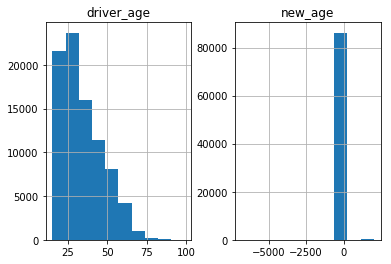

In [111]:
# compare the distributions
ri[['driver_age', 'new_age']].hist()

In [112]:
# compare the summary statistics (focus on min and max)
ri[['driver_age', 'new_age']].describe()

,driver_age,new_age
count,86120.000000,86414.000000
mean,34.011333,39.784294
std,12.738564,110.822145
min,15.000000,-6794.000000
25%,23.000000,24.000000
50%,31.000000,31.000000
75%,43.000000,43.000000
max,99.000000,2015.000000


In [113]:
# calculate how many ages are outside that range
ri[(ri.new_age < 15) | (ri.new_age > 99)].shape

(294, 18)

In [114]:
# raw data given to the researchers
ri.driver_age_raw.isnull().sum()

5327

In [115]:
# age computed by the researchers (has more missing values)
ri.driver_age.isnull().sum()

5621

In [116]:
#researchers set driver_age as missing if less than 15 or more than 99
5621-5327

294

In [117]:
# driver_age_raw NOT MISSING, driver_age MISSING
ri[(ri.driver_age_raw.notnull()) & (ri.driver_age.isnull())].head()

,stop_date,stop_time,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop,frisk,stop_datetime,stop_minutes,new_age
146,2005-10-05,08:50,M,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-05 08:50:00,8.0,2005.0
281,2005-10-10,12:05,F,0.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-10 12:05:00,8.0,2005.0
331,2005-10-12,07:50,M,0.0,NaN,White,Motorist Assist/Courtesy,Other,False,NaN,No Action,False,0-15 Min,False,NaN,2005-10-12 07:50:00,8.0,2005.0
414,2005-10-17,08:32,M,2005.0,NaN,White,Other Traffic Violation,Moving violation,False,NaN,Citation,False,0-15 Min,False,NaN,2005-10-17 08:32:00,8.0,0.0
455,2005-10-18,18:30,F,0.0,NaN,White,Speeding,Speeding,False,NaN,Warning,False,0-15 Min,False,NaN,2005-10-18 18:30:00,8.0,2005.0


In [118]:
# set the ages outside that range as missing
ri.loc[(ri.new_age < 15) | (ri.new_age > 99), 'new_age'] = np.nan

In [119]:
ri.new_age.equals(ri.driver_age)

True

In [120]:
ri.new_age.value_counts(dropna=False)

NaN      5621
 22.0    4125
 21.0    4063
 23.0    3986
 20.0    3794
 24.0    3782
 25.0    3537
 26.0    3335
 19.0    3228
 27.0    3048
 28.0    2781
 29.0    2541
 30.0    2436
 31.0    2200
 32.0    2186
 33.0    1956
 35.0    1868
 34.0    1826
 18.0    1734
 36.0    1709
 37.0    1631
 38.0    1602
 40.0    1582
 43.0    1571
 39.0    1558
 42.0    1528
 41.0    1496
 44.0    1445
 45.0    1378
 46.0    1357
         ... 
 65.0     258
 66.0     227
 67.0     174
 68.0     148
 69.0     120
 70.0     115
 71.0      94
 72.0      76
 73.0      66
 74.0      51
 16.0      45
 75.0      44
 76.0      42
 77.0      34
 79.0      24
 78.0      22
 80.0      18
 81.0      13
 82.0      12
 84.0       9
 86.0       7
 83.0       7
 87.0       6
 85.0       6
 15.0       5
 88.0       2
 94.0       1
 90.0       1
 99.0       1
 89.0       1
Name: new_age, Length: 79, dtype: int64